# **Iris Dataset**

## Goal
In this example notebook, I will be doing data analysis on scikitlearns iris dataset. By becoming familiar with the end to end data anlysis workflow with ample examples, insights, and documentation I hope to better understand the ideas behind experiments, the types of functions/tools used, and interpreting results. With these key ideas in mind, I will be prepared to reproduce research data analysis, pushing me toward my goal of becoming a competent Bioinformatician.

Follow the GFG link below to get further exmaples and guidance.
[GeeksForGeeks](https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-on-iris-dataset/)

The workflow will consist of:
- Data Import & Wrangling
- Exploratory Data Analysis
- Basic Hypothesis Testing
- Simple Classification
- Documentation / Reproducibility
  

### **Load Data**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = load_iris(as_frame=True).frame
# Note -> w/o 'as_frame=True', data would load as a 'Bunch' obj like a Dict.
# .frame comes from sklearn integrating with pd
print(df.head())

x = iris.data # Feature data
#print(f"Feature names: {iris.feature_names}")

y = iris.target # Target variable data
#print(f"Target names: {iris.target_names}")


# Print the first few samples in the dataset
print("First 5 samples:")
for i in range(5):
    print(f"Sample {i+1}: {x[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)


- iris_load() loads the data from sklearn
- With args 'as_frame=True', the set is loaded as a dataframe.
- Using '.frame' is an integrated way to transfer sklearn df to pandas df

In [2]:
df.shape # Returns the df shape

(150, 5)

In [3]:
df.info() # Returns columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe()  # Quick statistical summary of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### **Check for missing values**

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

- Missing values would return as null values in a data frame.
- In this case, there are zero missing values.

- [GeeksForGeeks-pandas-isnull-notnull](https://www.geeksforgeeks.org/python/python-pandas-isnull-and-notnull/)
- [Working-with-missing-values](https://www.geeksforgeeks.org/data-analysis/working-with-missing-data-in-pandas/)

### **Map species to target**

In [6]:
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

-  Since in the GFG tutorial included a column named 'species' and this one did not, we were able to map the species column manually matching the target (0,1, or 2) to the target_name being the species here.

### **Check for Duplicates**

In [7]:

dupe_data = df.drop_duplicates(subset="species")
print(dupe_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
50                 7.0               3.2                4.7               1.4   
100                6.3               3.3                6.0               2.5   

     target     species  
0         0      setosa  
50        1  versicolor  
100       2   virginica  


- Using Pandas [**drop_duplicates()**](https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-drop_duplicates/) method, we can check/remove for duplicates. In this case specifying the column to check for duplicates to species.

In [8]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## **Data Visualization**

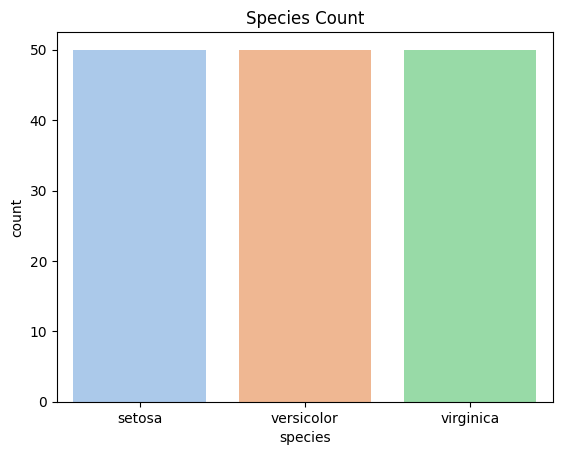

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species', hue='species', data=df, palette="pastel")
plt.title('Species Count')
plt.show()

- Using seaborns [**countplot**](https://seaborn.pydata.org/generated/seaborn.countplot.html#) to visualize each species counts.

## **Relation between variables**

Text(0.5, 1.0, 'Relationship between Sepal width & length')

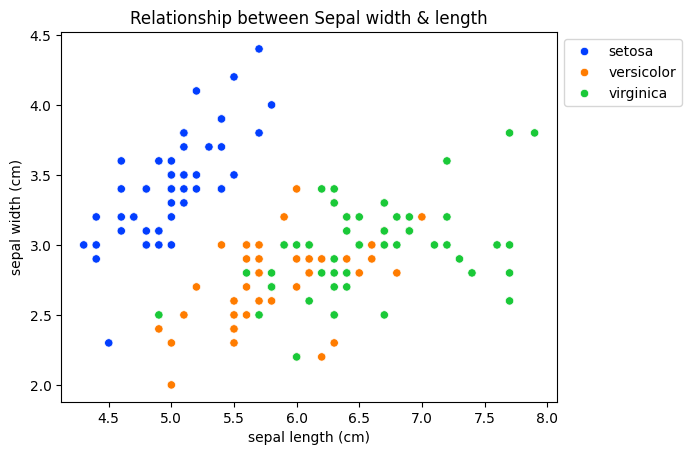

In [10]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='bright')
#print(df.keys()) # Shows available keys
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Relationship between Sepal width & length')


Text(0.5, 1.0, 'Relationship between Petal width & length')

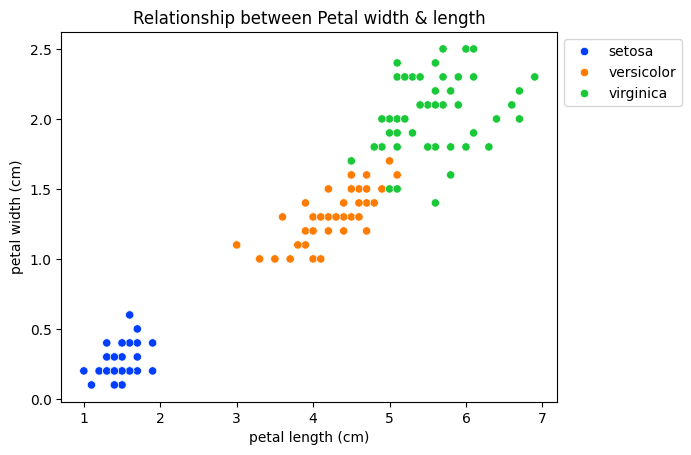

In [11]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='bright')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Relationship between Petal width & length')

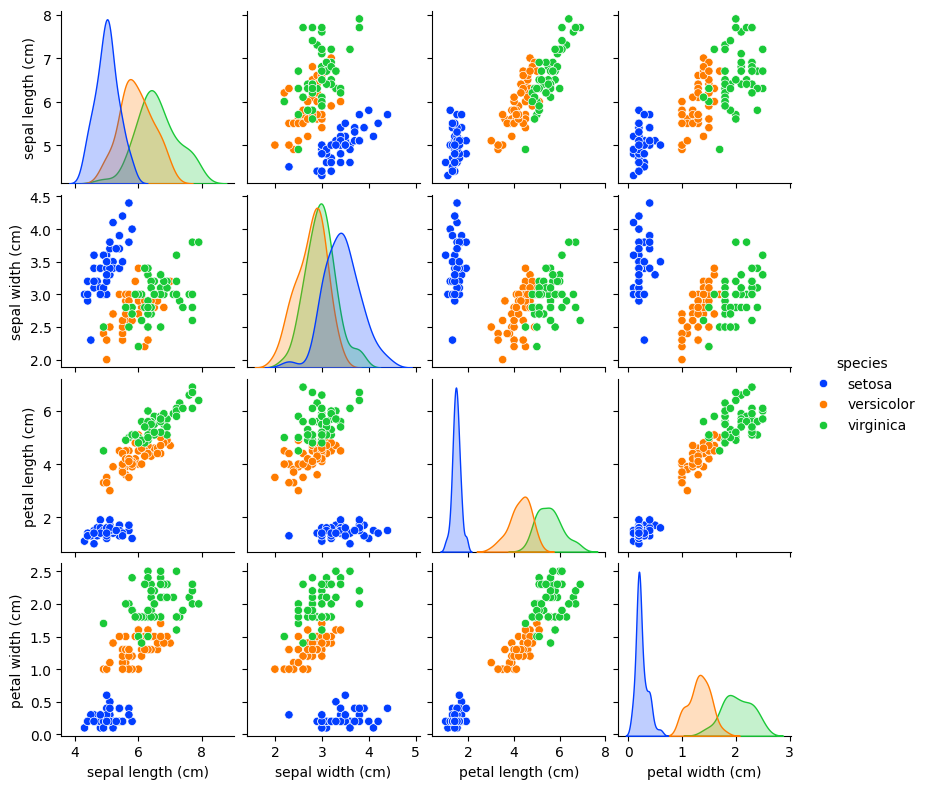

In [12]:
sns.pairplot(df.drop(['target'], axis=1), hue='species', height=2, palette='bright')


### **Histograms**

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

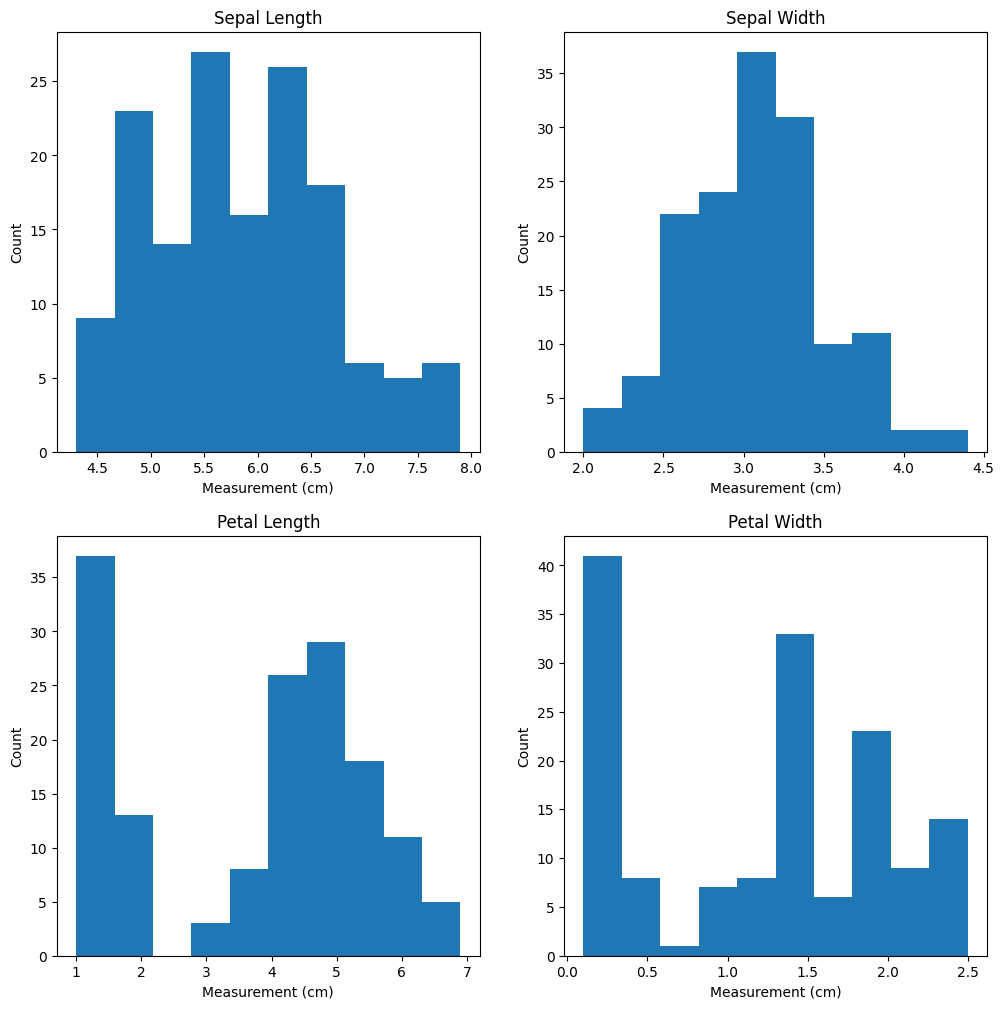

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].set_title('Sepal Length')
axes[0,0].set_xlabel('Measurement (cm)')
axes[0,0].set_ylabel('Count')
axes[0,0].hist(df['sepal length (cm)'], bins=10)

axes[0,1].set_title('Sepal Width')
axes[0,1].set_xlabel('Measurement (cm)')
axes[0,1].set_ylabel('Count')
axes[0,1].hist(df['sepal width (cm)'], bins=10)

axes[1,0].set_title('Petal Length')
axes[1,0].set_xlabel('Measurement (cm)')
axes[1,0].set_ylabel('Count')
axes[1,0].hist(df['petal length (cm)'], bins=10)

axes[1,1].set_title('Petal Width')
axes[1,1].set_xlabel('Measurement (cm)')
axes[1,1].set_ylabel('Count')
axes[1,1].hist(df['petal width (cm)'], bins=10)

- In this example, we use subplots with manual variable to be able to group plots together.

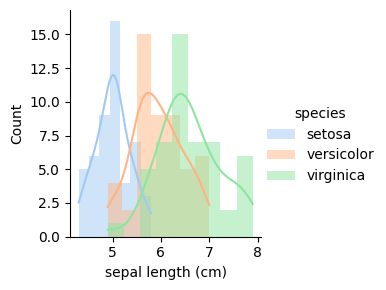

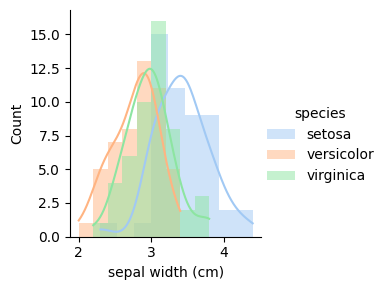

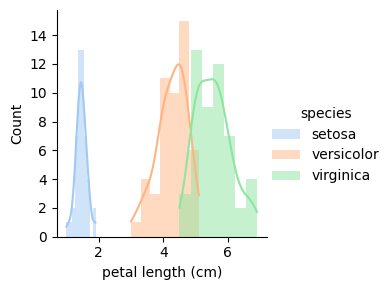

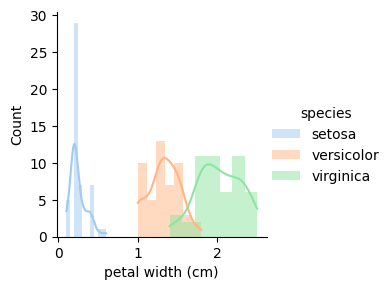

In [14]:
sns.set_palette('pastel')

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal length (cm)", edgecolor=None, kde=True).add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal width (cm)", edgecolor=None, kde=True).add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal length (cm)", edgecolor=None, kde=True).add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal width (cm)", edgecolor=None, kde=True).add_legend()

plt.show()

- Above we can visualize the overlap between sepal & petal measurements to each iris species by combining histogram with KDE curve.

### **Handling Correlation**

In [18]:
df.select_dtypes(include=['number']).corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


- Using Pandas' dataframe.corr() method finds pairwise correlation of all columns in the dataframe. Any NA values and non-numerical data is ignored.

### **Heatmaps**

<Axes: >

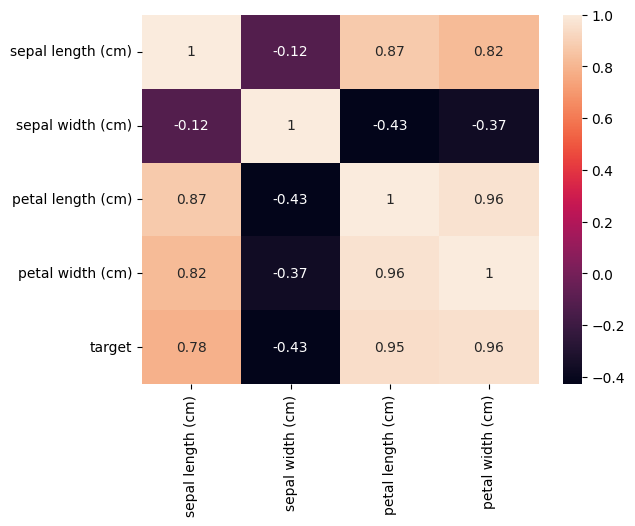

In [23]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop(['target'], axis=1), annot=True)

- Compared to the .corr() method, the heatmap displays the correlation in an easily decipherable color coded visual.

### **Box Plots**

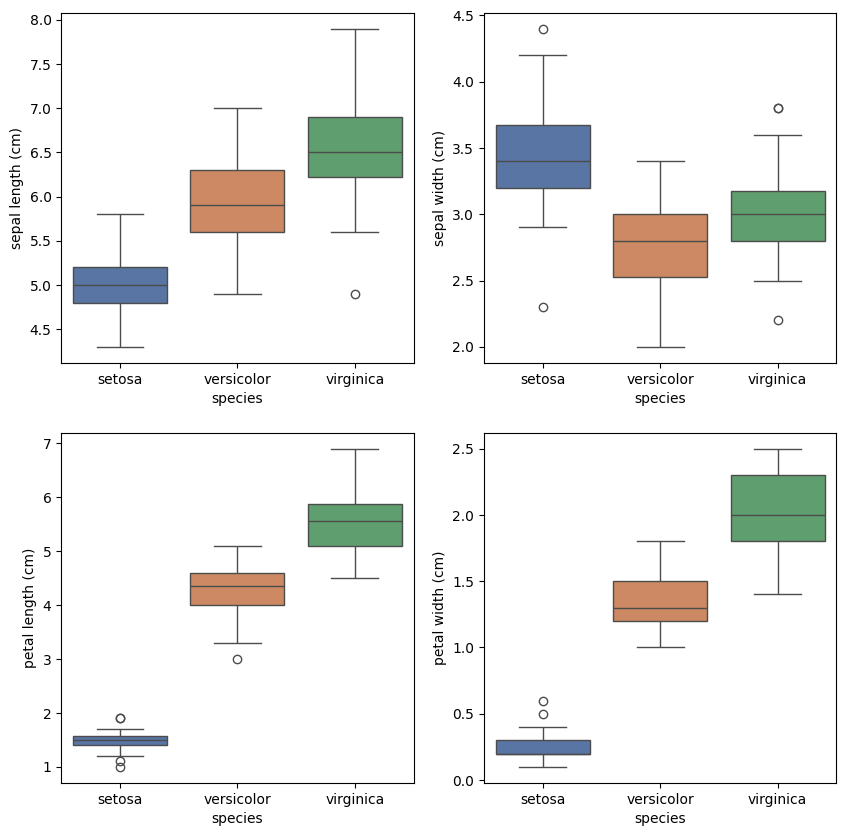

In [36]:

q = {221 : 'sepal length (cm)', 222 : 'sepal width (cm)', 223 : 'petal length (cm)', 224 : 'petal width (cm)'}

def graph(q):
    plt.figure(figsize=(10,10))
    
    for key, val in q.items():
        plt.subplot(key)
        sns.boxplot(x="species", y=val, data=df, hue='species', palette='deep')


graph(q)
plt.show()

- With the box plots, we can see the distribution of each categorical value alongside the other numerical values.
  
- From the above graph, we can see that: 

    - Species Setosa has the smallest features and less distributed with some outliers.
    - Species Versicolor has the average features.
    - Species Virginica has the highest features

### **Handling Outliers**

<Axes: xlabel='sepal width (cm)'>

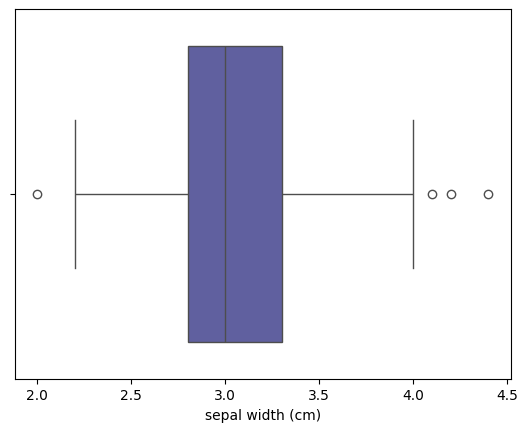

In [47]:
sns.boxplot(x='sepal width (cm)', data=df, color='blue', saturation=.25)

- In the above graph, the values above 4 and below 2 are acting as outliers.

#### Removing Outliers

Old Shape: (146, 6)
[]
New Shape: (146, 6)


<Axes: xlabel='sepal width (cm)'>

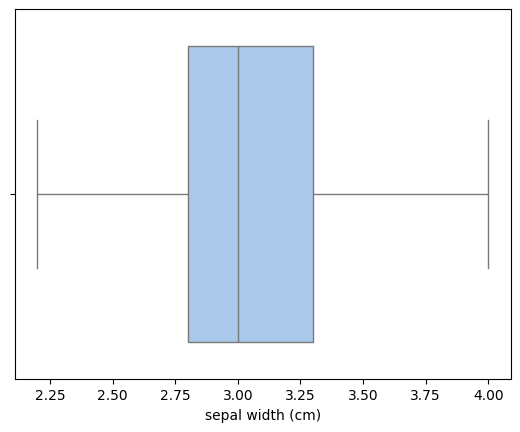

In [70]:
import numpy as np

# IQR
Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation='midpoint')

Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print(f"Old Shape: {df.shape}")

upper = np.where(df['sepal width (cm)'] >= (Q3+1.5*IQR))

lower = np.where(df['sepal width (cm)'] <= (Q1-1.5*IQR))

# Removing Outliers
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print(f"New Shape: {df.shape}")

sns.boxplot(x='sepal width (cm)', data=df)

-  Using **[interquartile range (IQR)](https://www.geeksforgeeks.org/dsa/interquartile-range-iqr/)** tells us where the bulk of the values lie. IQR is calculated via Q3 - Q1, where:
    - Q1 is defined as the middle number between the smallest number and the median of the data set.
    - Q2 is the median of the data.
    - Q3 is the middle value between the median and the highest value of the data set.
-  Numpy's [where()](https://www.geeksforgeeks.org/numpy/numpy-where-in-python/) method uses conditional selection to alter an array, returning specific elements meeting the conditional statement.

- Further guidance on removing outliers may be found [here](https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/)